In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
test_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')


#### **IMPORTS**

In [3]:
## BASIC IMPORTS
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import set_config

## PIPELINE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## DATA IMPUTATION
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

## DATA PREPROCESSING
#Scalar
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
#Transformer
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.preprocessing import PolynomialFeatures
#Feature_Encoding
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
#Label_Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
# from sklearn.preprocessing import MultiLabelBinarizer

## TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import StratifiedShuffleSplit

## MODELS
#LinearModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
#SVM
from sklearn.svm import SVC
# from sklearn.svm import NuSVC
# from sklearn.svm import LinearSVC
#Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
#Ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## CLASSIFICATION METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
# from sklearn.metrics import roc_curve

## HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

## MODEL VALIDATION & PLOT LEARNING CURVE
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import validation_curve

# Understand The MetaData / BigPicture

In [4]:
print(data.shape, test_data.shape)
data.head()

(12379, 31) (5305, 30)


,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [6]:
columns = data.dtypes.reset_index()
all_columns = data.columns
all_columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype='object')

In [7]:
num_cols = columns[columns[0] == 'int64']['index'].values
cat_cols = columns[columns[0] == 'object']['index'].values
num_cols, cat_cols

(array(['travelled_more_than_15mins_for_offer',
        'Prefer western over chinese',
        'travelled_more_than_25mins_for_offer',
        'travelled_more_than_5mins_for_offer',
        'restuarant_same_direction_house', 'Cooks regularly', 'is foodie',
        'restuarant_opposite_direction_house', 'has Children',
        'visit restaurant with rating (avg)', 'temperature', 'Travel Time',
        'Prefer home food'], dtype=object),
 array(['offer expiration', 'income_range', 'no_visited_Cold drinks',
        'Restaur_spend_less_than20', 'Marital Status', 'restaurant type',
        'age', 'no_visited_bars', 'gender', 'car', 'Customer type',
        'Qualification', 'no_Take-aways', 'Job/Job Industry',
        'Restaur_spend_greater_than20', 'Climate', 'drop location',
        'Offer Accepted'], dtype=object))

In [8]:
data['Offer Accepted'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
data['Offer Accepted'].value_counts()

Yes    6994
No     5385
Name: Offer Accepted, dtype: int64

**as count of 'yes' and 'No' is 6994 and 5385 resp, which is not very distant So, can do train_test_split (stratified may not be required)**

In [10]:
for cat_col in cat_cols:
    print(f"{cat_col} has - {data[cat_col].unique().tolist()}")
    print()

offer expiration has - ['2days', '10hours']

income_range has - ['₹100000 or More', '₹87500 - ₹99999', '₹37500 - ₹49999', 'Less than ₹12500', '₹50000 - ₹62499', '₹12500 - ₹24999', '₹75000 - ₹87499', '₹25000 - ₹37499', '₹62500 - ₹74999']

no_visited_Cold drinks has - ['4~8', 'less1', 'never', '1~3', 'gt8', nan]

Restaur_spend_less_than20 has - ['less1', '4~8', '1~3', 'gt8', 'never', nan]

Marital Status has - ['Married partner', 'Single', 'Divorced', 'Unmarried partner', 'Widowed']

restaurant type has - ['4 star restaurant', 'Take-away restaurant', 'Cold drinks', 'Restaurant with pub', '2 star restaurant']

age has - ['36', '50plus', '26', '46', '21', 'below21', '41', '31']

no_visited_bars has - ['less1', 'never', '1~3', nan, '4~8', 'gt8']

gender has - ['Female', 'Male']

car has - [nan, 'Mazda5', 'Car that is too old to install Onstar :D', 'crossover', 'Scooter and motorcycle', 'do not drive']

Customer type has - ['Individual', 'With Family', 'With Kids', 'With Colleagues']

Qualif

In [11]:
for num_col in num_cols:
    print(f"{num_col} has - {data[num_col].unique().tolist()}")
    print()

travelled_more_than_15mins_for_offer has - [1, 0]

Prefer western over chinese has - [0, 1]

travelled_more_than_25mins_for_offer has - [0, 1]

travelled_more_than_5mins_for_offer has - [1]

restuarant_same_direction_house has - [0, 1]

Cooks regularly has - [1, 0]

is foodie has - [0, 1]

restuarant_opposite_direction_house has - [0, 1]

has Children has - [0, 1]

visit restaurant with rating (avg) has - [4, 3, 0, 1, 2]

temperature has - [67, 89, 40]

Travel Time has - [22, 18, 7, 10, 14]

Prefer home food has - [0, 1]



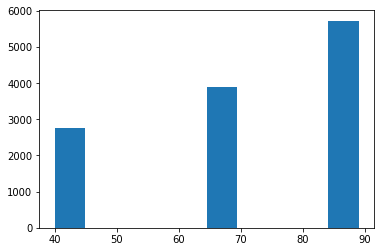

In [12]:
import matplotlib.pyplot as plt
# matplotlib.pyplot.hist(train_data['temperature'])
# matplotlib.pyplot.show()
plt.hist(data['temperature'])
plt.show()

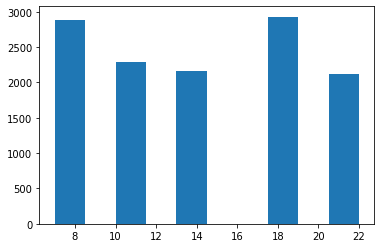

In [13]:
plt.hist(data['Travel Time'])
plt.show()

# Working With Columns

In [14]:
# train_data = train_data.replace({'Offer Accepted': {'Yes': 1, 'No': 0}})
# train_data = train_data.astype({'Offer Accepted': 'int64'})
# train_data.info()

In [15]:
columns['index'].values

array(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer',
       'Restaur_spend_less_than20', 'Marital Status', 'restaurant type',
       'age', 'Prefer western over chinese',
       'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)',
       'temperature', 'Restaur_spend_greater_than20', 'Travel Time',
       'Climate', 'drop location', 'Prefer home food', 'Offer Accepted'],
      dtype=object)

In [16]:
num_cols = ['temperature', 'Travel Time']
cat_cols = ['offer expiration', 'income_range', 'no_visited_Cold drinks',
        'Restaur_spend_less_than20', 'Marital Status', 'restaurant type',
        'age', 'no_visited_bars', 'gender', 'Customer type',
        'Qualification', 'no_Take-aways', 'Job/Job Industry',
        'Restaur_spend_greater_than20', 'Climate', 'drop location']

> **Handle `car` Column**

In [17]:
## Drop `car` column for now...
data = data.drop('car', axis=1)
test_data = test_data.drop('car', axis=1)

print(data.shape,test_data.shape)

data.info()

## May be later..
# data = data.replace({'car': {'Yes': 1, 'No': 0}})
# data = data.astype({'Offer Accepted': 'int64'})
# data['car'] = data['car'].fillna('no car')
# data.info()

(12379, 30) (5305, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_vi

> **`Handling Missing Values`**

In [18]:
data.isnull().sum()

offer expiration                          0
income_range                              0
no_visited_Cold drinks                  198
travelled_more_than_15mins_for_offer      0
Restaur_spend_less_than20               121
Marital Status                            0
restaurant type                           0
age                                       0
Prefer western over chinese               0
travelled_more_than_25mins_for_offer      0
travelled_more_than_5mins_for_offer       0
no_visited_bars                          93
gender                                    0
restuarant_same_direction_house           0
Cooks regularly                           0
Customer type                             0
Qualification                             0
is foodie                                 0
no_Take-aways                           144
Job/Job Industry                          0
restuarant_opposite_direction_house       0
has Children                              0
visit restaurant with rating (av

In [19]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11802 entries, 0 to 12378
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      11802 non-null  object
 1   income_range                          11802 non-null  object
 2   no_visited_Cold drinks                11802 non-null  object
 3   travelled_more_than_15mins_for_offer  11802 non-null  int64 
 4   Restaur_spend_less_than20             11802 non-null  object
 5   Marital Status                        11802 non-null  object
 6   restaurant type                       11802 non-null  object
 7   age                                   11802 non-null  object
 8   Prefer western over chinese           11802 non-null  int64 
 9   travelled_more_than_25mins_for_offer  11802 non-null  int64 
 10  travelled_more_than_5mins_for_offer   11802 non-null  int64 
 11  no_visited_bars             

In [20]:
data.isnull().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
travelled_more_than_5mins_for_offer     0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                       

# X - y Split

In [21]:
y = data['Offer Accepted']
X = data.drop('Offer Accepted', axis=1)
X.shape, y.shape

((11802, 29), (11802,))

# Column Transformation Pipeline

In [22]:
ct = ColumnTransformer([
    ('step_num_tr', MaxAbsScaler(), num_cols),
    ('step_cat_tr', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), cat_cols)
], remainder='passthrough')

pipe = Pipeline([
    ('step_apply_ct', ct),
    ('knnimputer', KNNImputer(n_neighbors=30))   #added
])

In [23]:
set_config(display='diagram')

pipe

Pipeline(steps=[('step_apply_ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step_num_tr', MaxAbsScaler(),
                                                  ['temperature',
                                                   'Travel Time']),
                                                 ('step_cat_tr',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['offer expiration',
                                                   'income_range',
                                                   'no_visited_Cold drinks',
                                                   'Restaur_spend_less_than20',
                                                   'Marital Status',
                                                   'restaurant type', 'age',
                                                   'no_visited_bars', 'gender',
                                                   'Customer type',
                                                   'Qualification',
                                                   'no_Take-aways',
                                                   'Job/Job Industry',
                                                   'Restaur_spend_greater_than20',
                                                   'Climate',
                                                   'drop location'])])),
                ('knnimputer', KNNImputer(n_neighbors=30))])

In [24]:
# FitTransform Feature Matrix
X_pipe = pipe.fit_transform(X)
train_pipe = pipe.fit_transform(X)
test_pipe = pipe.transform(test_data)  # fit_transform(test_data)

print(train_pipe.shape,test_pipe.shape)

X_pipe

(11802, 29) (5305, 29)


array([[0.75280899, 1.        , 1.        , ..., 0.        , 4.        ,
        0.        ],
       [1.        , 0.81818182, 1.        , ..., 1.        , 3.        ,
        0.        ],
       [0.75280899, 0.31818182, 1.        , ..., 1.        , 4.        ,
        1.        ],
       ...,
       [1.        , 0.81818182, 0.        , ..., 0.        , 2.        ,
        1.        ],
       [1.        , 0.31818182, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75280899, 0.31818182, 1.        , ..., 0.        , 0.        ,
        1.        ]])

> **`Train Test Split`**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pipe, y, test_size=0.2, random_state=42)


# Model Training

### **Logistic Regression**

In [26]:
# logistic_reg = SGDClassifier(
#     loss='log',
#     eta0=0.01,
#     learning_rate='adaptive',
#     alpha=0.01,
#     random_state=42, 
#     max_iter=1000,
# )
# logistic_reg.fit(X_train, y_train)

In [27]:
# y_pred = logistic_reg.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# cvscore = cross_val_score(logistic_reg, X_train, y_train, cv=9)
# print("Cross_Val_Score :", cvscore)
# print("\nMean Cross_Val_Score :", cvscore.mean())

In [28]:
# ## HPT
# y_train_en = LabelBinarizer().fit_transform(y_train).ravel()
# y_test_en = LabelBinarizer().fit_transform(y_test).ravel()

# estimator = SGDClassifier(
#     loss='log', 
#     learning_rate='adaptive', 
#     alpha=0.01
# )
# param_grid = {
#     'eta0' : [0.01,0.1,1.0,10]
# }
# gscv = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     scoring='f1'
# )
# gscv.fit(X_train, y_train_en)

# gscv.best_params_

---

### **Ridge Classifier**

In [29]:
# ridge = RidgeClassifier()
# ridge.fit(X_train, y_train)

In [30]:
# y_pred = ridge.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# cvscore = cross_val_score(ridge, X_train, y_train, cv=9)
# print("Cross_Val_Score :", cvscore)
# print("\nMean Cross_Val_Score :", cvscore.mean())

---

### **SVM(SVC)**

In [31]:
# ## HPT
# y_train_en = LabelBinarizer().fit_transform(y_train).ravel()
# y_test_en = LabelBinarizer().fit_transform(y_test).ravel()

# estimator = SVC(gamma='auto')
# param_grid = {
#     'C' : [1.0,1.2,1.4]
# }

# gscv = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     scoring='f1'
# )
# gscv.fit(X_train, y_train_en)
# gscv.best_params_

In [32]:
# ## MODEL
# svc_classifier = SVC(
#     C=1.0,
#     gamma='auto'
# )
# svc_classifier.fit(X_train, y_train)

In [33]:
# y_pred = svc_classifier.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(svc_classifier, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

### **BaggingClassifier**

In [34]:
# ## HPT
# y_train_en = LabelBinarizer().fit_transform(y_train).ravel()
# y_test_en = LabelBinarizer().fit_transform(y_test).ravel()
# estimator = BaggingClassifier(
#     base_estimator=SVC(gamma='auto'),
# )
# param_grid = {
#     'n_estimators' : [10,20,30]
# }

# gscv = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     scoring='f1'
# )
# gscv.fit(X_train, y_train_en)   # y_train)
# gscv.best_params_

In [35]:
# ## MODEL
# clfmodel = BaggingClassifier(
#     base_estimator=SVC(gamma='auto'),
#     n_estimators=20
# )
# clfmodel.fit(X_train, y_train)

In [36]:
# y_pred = clfmodel.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

---

### **AdaBoostClassifier**

In [37]:
# ## MODEL
# clfmodel = AdaBoostClassifier(
#     # base_estimator=SVC(gamma='auto'),
#     n_estimators=100,
#     # algorithm='SAMME',
# )
# clfmodel.fit(X_train, y_train)

In [38]:
# y_pred = clfmodel.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

---

### **GradientBoostingClassifier**

In [39]:
# ## HPT
# y_train_en = LabelBinarizer().fit_transform(y_train).ravel()
# y_test_en = LabelBinarizer().fit_transform(y_test).ravel()
# estimator = GradientBoostingClassifier(
# #     base_estimator=SVC(gamma='auto'),
# )
# param_grid = {
# #     'loss' : ['log', 'deviance', 'exponential'], # log_loss
#     'learning_rate' : [0.1,0.2,0.3],
#     'n_estimators' : [100,150,200],
# }

# gscv = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     scoring='f1'
# )
# gscv.fit(X_train, y_train_en)   # y_train)
# gscv.best_params_

In [40]:
# ## MODEL
# clfmodel = GradientBoostingClassifier(
# #     loss='deviance',
#     learning_rate=0.3,
# )
# clfmodel.fit(X_train, y_train)

In [41]:
# y_pred = clfmodel.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

### **GaussianNB**

In [42]:
# ## MODEL
# clfmodel = GaussianNB(
#     # base_estimator=SVC(gamma='auto'),
#     # n_estimators=100,
#     # algorithm='SAMME',
# )
# clfmodel.fit(X_train, y_train)

In [43]:
# y_pred = clfmodel.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

### **RandomForestClassifier**

In [44]:
# ## HPT
# y_train_en = LabelBinarizer().fit_transform(y_train).ravel()
# y_test_en = LabelBinarizer().fit_transform(y_test).ravel()
# estimator = RandomForestClassifier(
#     # base_estimator=SVC(gamma='auto'),
# )
# param_grid = {
#     'criterion' : ['gini', 'entropy'],
#     'max_features' : ['sqrt', 'log2'],
#     'bootstrap' : [True,False]
# }

# gscv = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     scoring='f1'
# )
# gscv.fit(X_train, y_train_en)   # y_train)
# gscv.best_params_

In [45]:
# ## MODEL
# clfmodel = RandomForestClassifier(
#     criterion='entropy',
#     max_features='log2',
# )
# clfmodel.fit(X_train, y_train)

In [46]:
# y_pred = clfmodel.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

### **HistGradientBoostingClassifier**

In [47]:
# ## HPT
# y_train_en = LabelBinarizer().fit_transform(y_train).ravel()
# y_test_en = LabelBinarizer().fit_transform(y_test).ravel()
# estimator = HistGradientBoostingClassifier(
#     # base_estimator=SVC(gamma='auto'),
# )
# param_grid = {
#     'loss' : ['auto', 'binary_crossentropy'],
#     'learning_rate' : [0.07,0.1,0.2],

    
# }

# gscv = GridSearchCV(
#     estimator=estimator,
#     param_grid=param_grid,
#     scoring='f1'
# )
# gscv.fit(X_train, y_train_en)   # y_train)
# gscv.best_params_

In [48]:
## MODEL
clfmodel = HistGradientBoostingClassifier(
    loss='auto',
    learning_rate=0.07,
)
clfmodel.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.07)

In [49]:
y_pred = clfmodel.predict(X_test)
print("y_pred :", y_pred)
print(classification_report(y_test, y_pred))
# cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# print("Cross_Val_Score :", cvscore)
# print("\nMean Cross_Val_Score :", cvscore.mean())

y_pred : ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
              precision    recall  f1-score   support

          No       0.59      0.44      0.51      1000
         Yes       0.66      0.78      0.71      1361

    accuracy                           0.64      2361
   macro avg       0.62      0.61      0.61      2361
weighted avg       0.63      0.64      0.62      2361



### **VotingClassifier**

In [50]:
# ## MODEL
# sgdclf = SGDClassifier(
#     loss='log',
#     eta0=0.01,
#     learning_rate='adaptive',
#     alpha=0.01)
# gnbclf = GaussianNB()
# svc_clf = SVC(gamma='auto') #SVC(gamma='auto', probability=True)
# bagclf = BaggingClassifier(
#     base_estimator=SVC(gamma='auto'),
#     n_estimators=25)
# adbclf = AdaBoostClassifier(n_estimators=100)
# gdbclf = GradientBoostingClassifier(learning_rate=0.3)
# rndforclf = RandomForestClassifier(
#     criterion='entropy',
#     max_features='log2')
# histgdbclf = HistGradientBoostingClassifier(
#     loss='auto',
#     learning_rate=0.07)


# clfmodel = VotingClassifier(
#     estimators=[
#         ('sgdclf', sgdclf),
#         ('gnbclf', gnbclf),
#         ('svc_clf', svc_clf),
#         ('bagclf', bagclf),
#         ('adbclf', adbclf),
#         ('gdbclf', gdbclf),
#         ('rndforclf', rndforclf),
#         ('histgdbclf', histgdbclf)],
#     # weights=[1,2,3,3,4,5,5,7],
#     voting='hard',
# )
# clfmodel.fit(X_train, y_train)

In [51]:
# y_pred = clfmodel.predict(X_test)
# print("y_pred :", y_pred)
# print(classification_report(y_test, y_pred))
# # cvscore = cross_val_score(clfmodel, X_train, y_train, cv=9)
# # print("Cross_Val_Score :", cvscore)
# # print("\nMean Cross_Val_Score :", cvscore.mean())

## TRAIN BEST MODEL WITH ENTIRE TRAINING DATA

In [52]:
clfmodel = HistGradientBoostingClassifier(
    loss='auto',
    learning_rate=0.07,
)




clfmodel.fit(train_pipe, y)

HistGradientBoostingClassifier(learning_rate=0.07)

---

In [53]:
# from sklearn.ensemble import GradientBoostingClassifier

# my_bestmodel = GradientBoostingClassifier()
# my_bestmodel.fit(X_train, y_train)

---

In [54]:
# test_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')
# X_test = test_data[cols_tolearn]

In [55]:
# prediction = my_bestmodel.predict(X_test)
# prediction = logistic_reg.predict(full_pipeline.transform(X_test))

---

## Final Prediction for Entire Test Data

In [56]:
prediction = clfmodel.predict(test_pipe)
print(test_pipe.shape, prediction.shape)
prediction

(5305, 29) (5305,)


array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [57]:
submission = pd.DataFrame(columns = ['id', 'Offer Accepted'])
submission['id'] = [i for i in range(len(prediction))]
submission['Offer Accepted'] = prediction

In [58]:
submission.head()

,id,Offer Accepted
0,0,No
1,1,Yes
2,2,No
3,3,No
4,4,Yes


In [59]:
submission.to_csv('submission.csv', index=False)